<a href="https://colab.research.google.com/github/AdvikarA/LithographicFacies/blob/main/LithoFacies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#las 
path="/content/drive/MyDrive/Advikar Ananthkumar/data/F02-1_logs.las.txt"
data = np.loadtxt(path, skiprows=35)

# Remove -999.25 as NaNs
data[data==-999.2500] = np.nan
# Convert data array to dataframe
mneumonics = ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AIR', 'PHIE']
data = pd.DataFrame(data, columns=mneumonics)
data = data.dropna()
data.head(100)
print(data["DEPTH"])
data.info()




3308     544.2000
3309     544.3500
3310     544.5000
3311     544.6500
3312     544.8000
          ...    
8209    1279.3501
8210    1279.5000
8211    1279.6500
8212    1279.8000
8213    1279.9501
Name: DEPTH, Length: 4906, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4906 entries, 3308 to 8213
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   4906 non-null   float64
 1   RHOB    4906 non-null   float64
 2   DT      4906 non-null   float64
 3   GR      4906 non-null   float64
 4   AI      4906 non-null   float64
 5   AIR     4906 non-null   float64
 6   PHIE    4906 non-null   float64
dtypes: float64(7)
memory usage: 306.6 KB


In [ ]:
path="/content/drive/MyDrive/Advikar Ananthkumar/data/F03-2_logs.las.txt"
test_data = np.loadtxt(path, skiprows=35)
# Remove -999.25 as NaNs
test_data[test_data==-999.2500] = np.nan
# Convert data array to dataframe
mneumonics = ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AIR', 'PHIE']
test_data = pd.DataFrame(test_data, columns=mneumonics)
test_data = test_data.dropna()
test_data.head(100)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 1 to 9823
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   9823 non-null   float64
 1   RHOB    9823 non-null   float64
 2   DT      9823 non-null   float64
 3   GR      9823 non-null   float64
 4   AI      9823 non-null   float64
 5   AIR     9823 non-null   float64
 6   PHIE    9823 non-null   float64
dtypes: float64(7)
memory usage: 613.9 KB


In [ ]:
path="/content/drive/MyDrive/Advikar Ananthkumar/data/facies_code.csv"
facies_data = pd.read_csv(path)
depths = list(facies_data["MARKER_DEPTH"])
facies = list(facies_data.FACIES)
faciesdict = dict()
for i in range(len(depths)-1):
  faciesdict[(depths[i], depths[i+1])] = facies[i]
print(facies_data)
print(faciesdict)

    MARKER_DEPTH  FACIES
0              0       1
1            464       2
2            539       3
3            612       1
4            635       3
5            687       4
6            702       3
7            795       1
8            814       3
9            926       1
10           949       3
11          1026       1
12          1053       3
13          1095       1
14          1133       3
15          1270       4
16          1297       3
17          1430       1
{(0, 464): 1, (464, 539): 2, (539, 612): 3, (612, 635): 1, (635, 687): 3, (687, 702): 4, (702, 795): 3, (795, 814): 1, (814, 926): 3, (926, 949): 1, (949, 1026): 3, (1026, 1053): 1, (1053, 1095): 3, (1095, 1133): 1, (1133, 1270): 3, (1270, 1297): 4, (1297, 1430): 3}


In [ ]:
facies_list = []
def label_depth(depth):
  for depthrange in faciesdict:
    if(depthrange[0] <= depth < depthrange[1]):
      return faciesdict[depthrange]


In [ ]:
label_data = data
label_data["label"] = label_data["DEPTH"].apply(label_depth)
print(label_data.iloc[0:20])
facies_list = label_data.label
print(facies_list)


       DEPTH       RHOB        DT       GR          AI          AIR    PHIE  \
3308  544.20  1897.7505  521.8398  46.3490  3636762.00  188158.9844  0.4702   
3309  544.35  1950.1143  519.4737  46.2888  3754059.75  188158.9844  0.4375   
3310  544.50  1968.0576  518.0292  46.2888  3799134.75  188158.9844  0.4262   
3311  544.65  1984.5618  525.4709  49.1604  3776786.25  188158.9844  0.4159   
3312  544.80  1974.3237  537.0573  56.4415  3676511.00  188158.9844  0.4223   
3313  544.95  1984.2185  548.7537  65.9561  3616014.00  188158.9844  0.4161   
3314  545.10  2044.5334  567.8348  67.5387  3600622.50  188158.9844  0.3784   
3315  545.25  2055.3286  566.8513  67.5387  3625920.75  188158.9844  0.3717   
3316  545.40  2047.6221  555.2444  66.1885  3688060.00  188158.9844  0.3765   
3317  545.55  2038.2754  541.1078  62.0631  3767255.25  188158.9844  0.3823   
3318  545.70  2011.1628  531.0873  57.8931  3786880.25  188158.9844  0.3993   
3319  545.85  1997.9219  534.1998  55.7628  3740182.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
X = data[['RHOB', 'DT', 'GR', 'AI', 'AIR', 'PHIE']]
y = label_data.label
#print(y.value_counts())
#print(set(y))
#print(X.shape)
#print(y.shape)
# Split training features and target
X_train = data[['RHOB', 'AI', 'GR', 'PHIE', 'AIR']]
X_test = test_data[['RHOB', 'AI', 'GR', 'PHIE', 'AIR']]
y_train = label_data.label
y_train.head()
# Define stratified sampling CV 
cv = StratifiedKFold(5, shuffle=True)

# Cross-validation

print((y_train))

3308    3
3309    3
3310    3
3311    3
3312    3
       ..
8209    4
8210    4
8211    4
8212    4
8213    4
Name: label, Length: 4906, dtype: int64


Accuracy mean from 5-fold CV: 0.8599674881817672


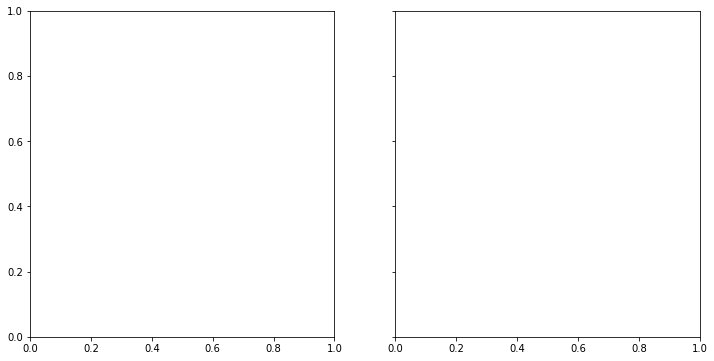

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

clf = RidgeClassifier()
clf.fit(X_train, y_train)
#clf.score(X_test, y_test)
#y_pred=clf.predict(X_test)
#print(set(y_pred))
#print(accuracy_score(y_test, y_pred))

logs = data.columns[1:]
rows,cols = 1,2
pipe = make_pipeline(StandardScaler(), clf)
# Fit model to training data

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)
cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
mean_cv_scores = np.mean(cv_scores)
print('Accuracy mean from 5-fold CV:', mean_cv_scores)


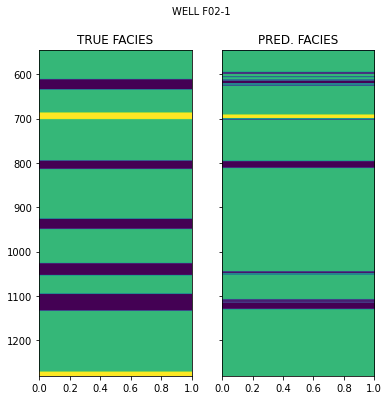

In [ ]:
# Fit model to training data
pipe.fit(X_train, y_train)

# Predict facies on training data
y_pred = pipe.predict(X_train)

logs = X_train.columns
rows,cols = 1,2
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(6,6), sharey=True)

plt.suptitle('WELL F02-1', size=10)
for i in range(cols):
  if i < cols-2:
    ax[i].plot(data[logs[i]], data.DEPTH, color='b', lw=0.5)
    ax[i].set_title('%s' % logs[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
  elif i==cols-2:
    F = np.vstack((facies_list,facies_list)).T
    ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
    ax[i].set_title('TRUE FACIES')
  elif i==cols-1:
    F = np.vstack((y_pred,y_pred)).T
    ax[i].imshow(F, aspect='auto', extent=[0,1,max(label_data.DEPTH), min(label_data.DEPTH)])
    ax[i].set_title('PRED. FACIES')    

Accuracy mean from CV: 0.860987686615968
Accuracy mean from CV: 0.8997151582719324
Accuracy mean from CV: 0.8420307637370736
Accuracy mean from CV: 0.961881657812075
Accuracy mean from CV: 0.9708520961403115
Accuracy mean from CV: 0.9641267587212017


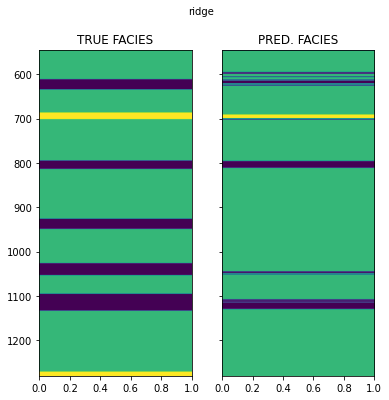

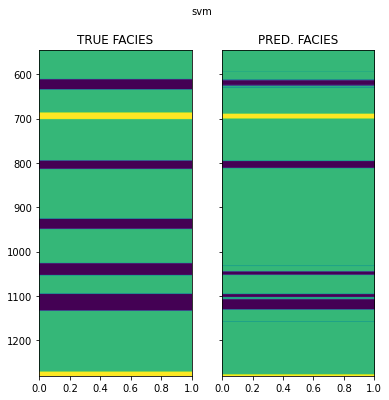

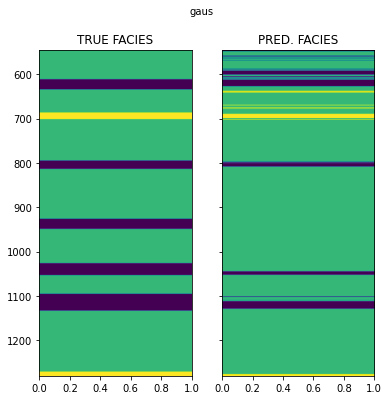

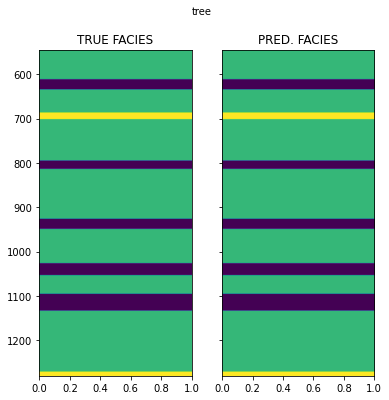

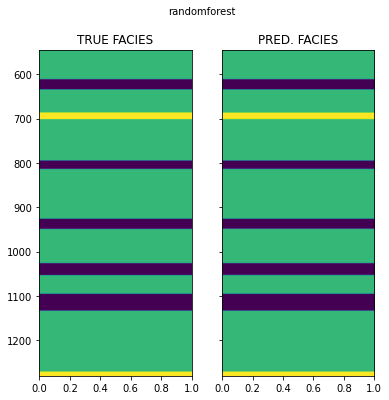

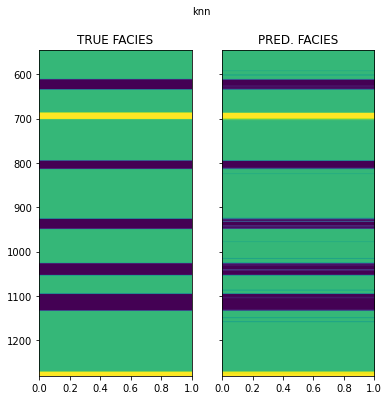

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
for i in range(6):
  if i == 0: 
    clf = RidgeClassifier()
    name="ridge"
  if i == 1: 
    clf = svm.SVC()
    name="svm"
  if i == 2: 
    clf = GaussianNB()
    name="gaus"
  if i == 3: 
    clf = tree.DecisionTreeClassifier()
    name="tree"
  if i == 4:
    clf = RandomForestClassifier(n_estimators=10)
    name="randomforest"
  if i == 5: 
    clf = KNeighborsClassifier(n_neighbors=3)
    name="knn"

  pipe = make_pipeline(StandardScaler(), clf)
  # Fit model to training data

  cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
  mean_cv_scores = np.mean(cv_scores)
  print('Accuracy mean from CV:', mean_cv_scores)
  # Fit model to training data
  pipe.fit(X_train, y_train)

  # Predict facies on training data
  y_pred = pipe.predict(X_train)

  logs = X_train.columns
  rows,cols = 1,2
  fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(6,6), sharey=True)
  len
  plt.suptitle(name, size=10)
  for i in range(cols):
    if i < cols-2:
      ax[i].plot(data[logs[i]], data.DEPTH, color='b', lw=0.5)
      ax[i].set_title('%s' % logs[i])
      ax[i].minorticks_on()
      ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
      ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
      ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
    elif i==cols-2:
      F = np.vstack((facies_list,facies_list)).T
      ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
      ax[i].set_title('TRUE FACIES')
    elif i==cols-1:
      F = np.vstack((y_pred,y_pred)).T
      ax[i].imshow(F, aspect='auto', extent=[0,1,max(label_data.DEPTH), min(label_data.DEPTH)])
      ax[i].set_title('PRED. FACIES')   

Accuracy mean from CV: 0.9688125297142657
Accuracy mean from CV: 0.9620863618527998
Accuracy mean from CV: 0.96392143184871
Accuracy mean from CV: 0.9576036340157493
Accuracy mean from CV: 0.9590290883196205
Accuracy mean from CV: 0.9582121406520219


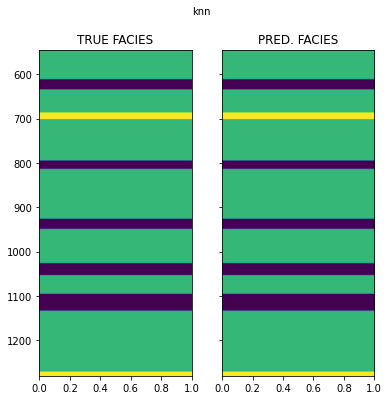

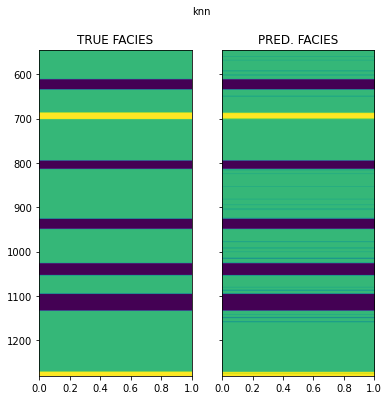

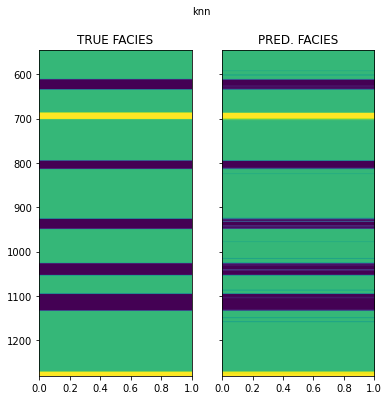

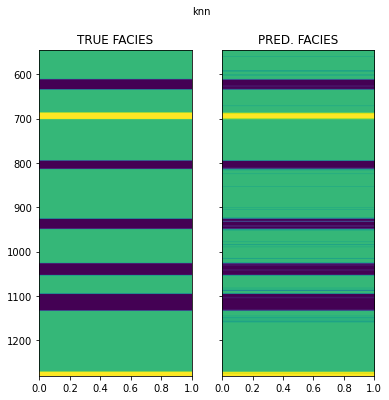

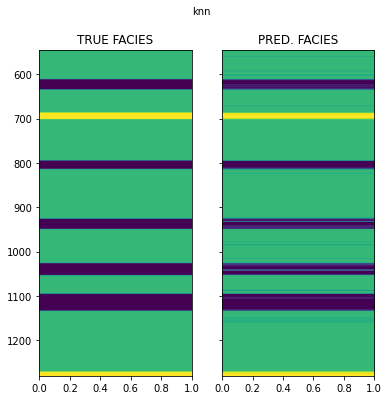

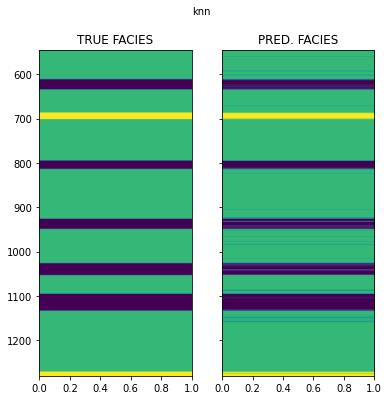

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
for i in range(6):
  clf = KNeighborsClassifier(n_neighbors=i+1)
  pipe = make_pipeline(StandardScaler(), clf)
  cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
  mean_cv_scores = np.mean(cv_scores)
  print('Accuracy mean from CV:', mean_cv_scores)
  # Fit model to training data
  pipe.fit(X_train, y_train)
  # Predict facies on training data
  y_pred = pipe.predict(X_train)
  logs = X_train.columns
  rows,cols = 1,2
  fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(6,6), sharey=True)
  len
  plt.suptitle(name, size=10)
  for i in range(cols):
    if i < cols-2:
      ax[i].plot(data[logs[i]], data.DEPTH, color='b', lw=0.5)
      ax[i].set_title('%s' % logs[i])
      ax[i].minorticks_on()
      ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
      ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
      ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
    elif i==cols-2:
      F = np.vstack((facies_list,facies_list)).T
      ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
      ax[i].set_title('TRUE FACIES')
    elif i==cols-1:
      F = np.vstack((y_pred,y_pred)).T
      ax[i].imshow(F, aspect='auto', extent=[0,1,max(label_data.DEPTH), min(label_data.DEPTH)])
      ax[i].set_title('PRED. FACIES')   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4906 entries, 3308 to 8213
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   4906 non-null   float64
 1   RHOB    4906 non-null   float64
 2   DT      4906 non-null   float64
 3   GR      4906 non-null   float64
 4   AI      4906 non-null   float64
 5   AIR     4906 non-null   float64
 6   PHIE    4906 non-null   float64
 7   label   4906 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 345.0 KB


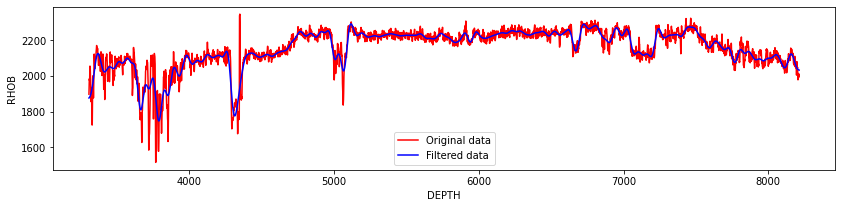

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

data['AILP'] = butter_lowpass_filter(data.AI.values, 4, 1000/4, order=5) 
data['AIRLP'] = butter_lowpass_filter(data.AIR.values, 4, 1000/4, order=5) 
data['RHOBLP'] = butter_lowpass_filter(data.RHOB.values, 4, 1000/4, order=5) 
data['GRLP'] = butter_lowpass_filter(data.GR.values, 4, 1000/4, order=5) 
data['PHIELP'] = butter_lowpass_filter(data.PHIE.values, 4, 1000/4, order=5) 
plt.figure(figsize=(14,3))
plt.plot(data.RHOB, 'r', label='Original data')
plt.plot(data.RHOBLP, 'b', label='Filtered data')
plt.xlabel('DEPTH'); plt.ylabel('RHOB')
plt.legend(loc='lower center')
plt.show()



Accuracy mean from CV: 0.9920503829377314


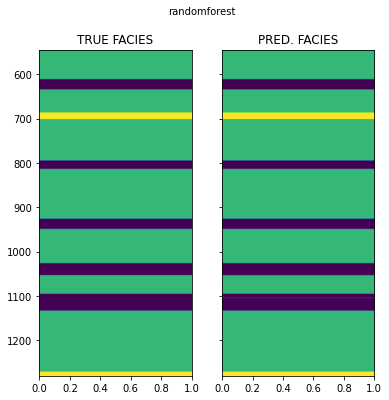

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
X_train = data[['RHOBLP', 'AILP', 'GRLP', 'PHIELP', 'AIRLP']]

for i in range(1):
  if i == 0:
    clf = KNeighborsClassifier(n_neighbors=4)
    name="randomforest"


  pipe = make_pipeline(StandardScaler(), clf)
  # Fit model to training data

  cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
  mean_cv_scores = np.mean(cv_scores)
  
  print('Accuracy mean from CV:', mean_cv_scores)
  # Fit model to training data
  pipe.fit(X_train, y_train)

  # Predict facies on training data
  y_pred = pipe.predict(X_train)

  logs = X_train.columns
  rows,cols = 1,2
  fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(6,6), sharey=True)
  len
  plt.suptitle(name, size=10)
  for i in range(cols):
    if i < cols-2:
      ax[i].plot(data[logs[i]], data.DEPTH, color='b', lw=0.5)
      ax[i].set_title('%s' % logs[i])
      ax[i].minorticks_on()
      ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
      ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
      ax[i].set_ylim(max(data.DEPTH), min(data.DEPTH))
    elif i==cols-2:
      F = np.vstack((facies_list,facies_list)).T
      ax[i].imshow(F, aspect='auto', extent=[0,1,max(data.DEPTH), min(data.DEPTH)])
      ax[i].set_title('TRUE FACIES')
    elif i==cols-1:
      F = np.vstack((y_pred,y_pred)).T
      ax[i].imshow(F, aspect='auto', extent=[0,1,max(label_data.DEPTH), min(label_data.DEPTH)])
      ax[i].set_title('PRED. FACIES')   

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


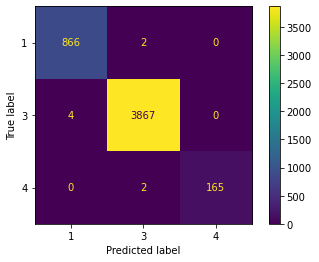

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix
plot_confusion_matrix(pipe, X_train, y_train)



In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
#clf.score(X_test, y_test)
y_pred=clf.predict(X_test)
print(set(y_pred))
print(accuracy_score(y_test, y_pred))

logs = data.columns[1:]
rows,cols = 1,2
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)

plt.suptitle('WELL F02-1', size=15)
for i in range(2):
    if i < 1:
        F = np.vstack((y_test,y_test)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(label_data.depth), min(label_data.depth)], cmap='rainbow')
        ax[i].set_title('EXPECTED')
    elif i==1:
        F = np.vstack((y_pred,y_pred)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(label_data.depth), min(label_data.depth)], cmap='rainbow')
        ax[i].set_title('PREDICTED')

{1, 3, 4}


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AI
- AIR
- GR
- PHIE
- RHOB
Feature names seen at fit time, yet now missing:
- AILP
- AIRLP
- GRLP
- PHIELP
- RHOBLP

  warnings.warn(message, FutureWarning)


NameError: ignored

In [ ]:
data.shape
data.describe()
data.columns= ["depth",
"density",
"sonic",
"gamma_ray",
"p_impedance",
"p_impedance_rel",
"porosity",
"label",
"p_impedanceLP",
"p_impedance_relLP",
"densityLP",
"gamma_rayLP",
"porosityLP",
]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4906 entries, 3308 to 8213
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   depth              4906 non-null   float64
 1   density            4906 non-null   float64
 2   sonic              4906 non-null   float64
 3   gamma_ray          4906 non-null   float64
 4   p_impedance        4906 non-null   float64
 5   p_impedance_rel    4906 non-null   float64
 6   porosity           4906 non-null   float64
 7   label              4906 non-null   int64  
 8   p_impedanceLP      4906 non-null   float64
 9   p_impedance_relLP  4906 non-null   float64
 10  densityLP          4906 non-null   float64
 11  gamma_rayLP        4906 non-null   float64
 12  porosityLP         4906 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 536.6 KB


In [ ]:
import matplotlib.pyplot as plt

#plt.hist(data['depth'], bins=25, edgecolor = 'black')
#plt.xlim([0, 2000])
#plt.ylim([0, 2000])

#plt.xlabel('depth')
#plt.show()
#data['depth'].value_counts()

sns.scatterplot(data["depth"], data["RHOB"])


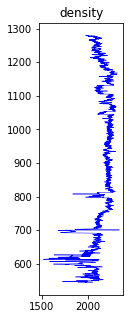

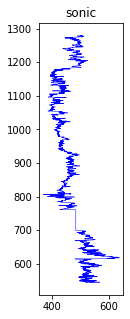

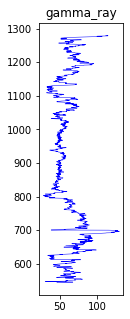

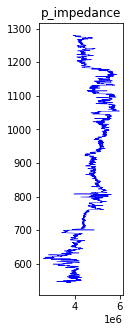

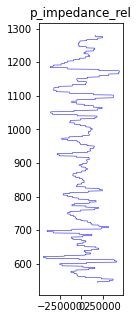

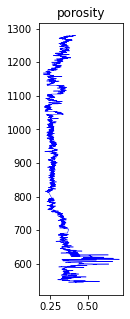

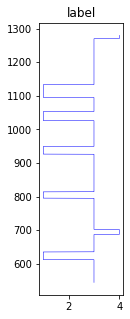

In [ ]:
for i in range(1, 8):

  plt.figure(figsize=(1.5, 5))

  plt.plot(label_data[label_data.columns[i]], label_data["depth"], color='b', lw=0.5)
  plt.title(label_data.columns[i])
  #if(i==6):
  plt.show()




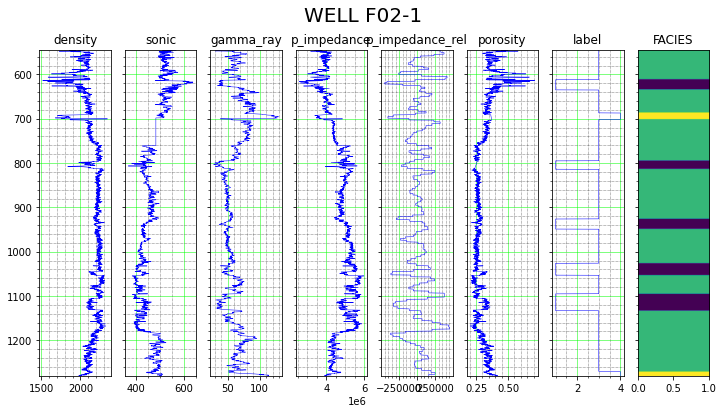

In [ ]:
logs = data.columns[1:]
rows,cols = 1,8
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)

plt.suptitle('WELL F02-1', size=20)
for i in range(8):
    if i < 7:
        ax[i].plot(label_data[logs[i]], label_data.depth, color='b', lw=0.5)
        ax[i].set_title('%s' % logs[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(label_data.depth), min(label_data.depth))
    elif i==7:
        F = np.vstack((facies_list,facies_list)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(label_data.depth), min(label_data.depth)])
        ax[i].set_title('FACIES')

In [ ]:

g = sns.FacetGrid(data, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Advikar Ananthkumar/data/training_data.csv")
!ls

In [ ]:
path="/content/drive/MyDrive/Advikar Ananthkumar/data/training_data.csv"
df=pd.read_csv(path)
print(df.head())

In [ ]:
print(df.shape)

In [ ]:
#np.sum(df.isnull())
df.isna().sum()

In [ ]:
pca=PCA(n_components=8)
tempdf = df.loc[:, "Depth":]
xtrain = pca.fit_transform(tempdf)
variance = pca.explained_variance_ratio_
print(variance)

Recall: TP / (TP + FN)

Specificity = TN / (TN + FP)

Precision = TP / (TP + FP)




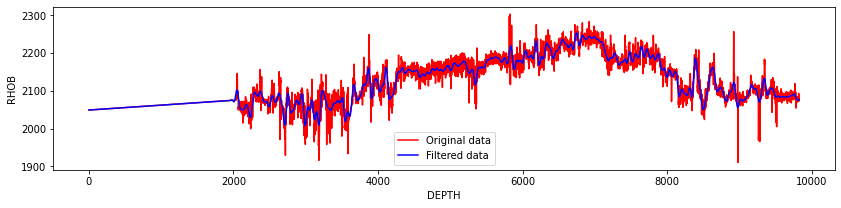

In [ ]:
test_data['AILP'] = butter_lowpass_filter(test_data.AI.values, 4, 1000/4, order=5) 
test_data['AIRLP'] = butter_lowpass_filter(test_data.AIR.values, 4, 1000/4, order=5) 
test_data['RHOBLP'] = butter_lowpass_filter(test_data.RHOB.values, 4, 1000/4, order=5) 
test_data['GRLP'] = butter_lowpass_filter(test_data.GR.values, 4, 1000/4, order=5) 
test_data['PHIELP'] = butter_lowpass_filter(test_data.PHIE.values, 4, 1000/4, order=5) 
plt.figure(figsize=(14,3))
plt.plot(test_data.RHOB, 'r', label='Original data')
plt.plot(test_data.RHOBLP, 'b', label='Filtered data')
plt.xlabel('DEPTH'); plt.ylabel('RHOB')
plt.legend(loc='lower center')
plt.show()

In [ ]:
# Define test set
X_test = test_data[['RHOBLP', 'AILP', 'GRLP', 'PHIELP', 'AIRLP']]

# Predict on test set
y_pred = pipe.predict(X_test)

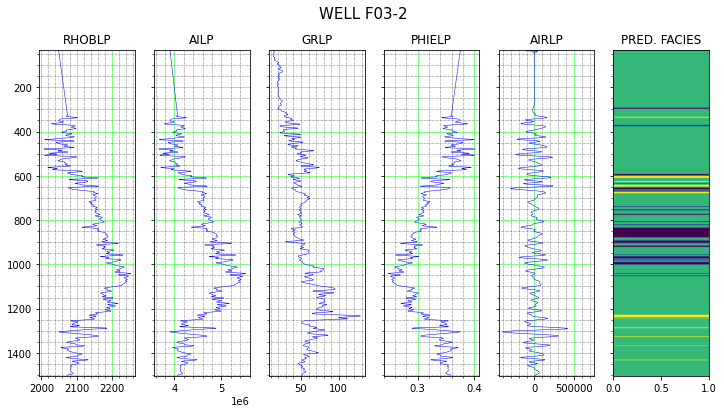

In [ ]:
logs = X_test.columns
rows,cols = 1,6
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,6), sharey=True)

plt.suptitle('WELL F03-2', size=15)
for i in range(cols):
  if i < cols-1:
    ax[i].plot(test_data[logs[i]], test_data.DEPTH, color='b', lw=0.5)
    ax[i].set_title('%s' % logs[i])
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_ylim(max(test_data.DEPTH), min(test_data.DEPTH))
  elif i==cols-1:
    F = np.vstack((y_pred,y_pred)).T
    ax[i].imshow(F, aspect='auto', extent=[0,1,max(test_data.DEPTH), min(test_data.DEPTH)])
    ax[i].set_title('PRED. FACIES')    

In [1]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone             Clone a repository into a new directory
   init              Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add               Add file contents to the index
   mv                Move or rename a file, a directory, or a symlink
   restore           Restore working tree files
   rm                Remove files from the working tree and from the index
   sparse-checkout   Initialize and modify the sparse-checkout

examine the history and state (see also: git help revisio